**RAHUL SATHEESAN NAIR**

# Overview

Here we have google share prices with open, high, low , close values for a particular day.
Using this data in our LSTM model we will predict the open prices for next 20 days.



In [12]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras

In [13]:
#Importing the data

test= pd.read_csv('Price_Test.csv')
train= pd.read_csv('Price_Train.csv')

In [14]:
train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [15]:
#taking open price from data in 2d array , if we will do train.loc[:, 'open'].values it gives one d array which wont
#be considered in scaling
train_open= train.iloc[:, 1:2].values


In [16]:
#Scaling the values between 0 to 1
from sklearn.preprocessing import MinMaxScaler
ss= MinMaxScaler(feature_range=(0,1))
train_open_scaled= ss.fit_transform(train_open)

In [17]:
train_open_scaled[60]

array([0.08627874])

Below we will be taking previous 60 days open datasteps to predict the next values so we are converting the data as per our input in LTSM layers.
i.e for taking 0 to 59 days open price to get 60th day price as output, 1 to 60 for 61, 2 to 61 for 62

In [18]:
# Feature selection
xtrain=[]
ytrain=[]
for i in range(60,len(train_open_scaled)):
    xtrain.append(train_open_scaled[i-60:i,0])
    ytrain.append(train_open_scaled[i,0])

xtrain, ytrain = np.array(xtrain), np.array(ytrain)

In [19]:
#Reshaping the train data to make it as input for LTSM layer input_shape(batchzise,timesteps,input_dim)
xtrain= np.reshape(xtrain,(xtrain.shape[0],xtrain.shape[1],1))

In [20]:
xtrain.shape

(1198, 60, 1)

### Building the LSTM Network

In [21]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

In [22]:
#initialisizng the model
regression= Sequential()

#First Input layer and LSTM layer with 0.2% dropout
regression.add(LSTM(units=50,return_sequences=True,kernel_initializer='glorot_uniform',input_shape=(xtrain.shape[1],1)))
regression.add(Dropout(0.2))

# Where:
#     return_sequences: Boolean. Whether to return the last output in the output sequence, or the full sequence.

# Second LSTM layer with 0.2% dropout
regression.add(LSTM(units=50,kernel_initializer='glorot_uniform',return_sequences=True))
regression.add(Dropout(0.2))

#Third LSTM layer with 0.2% dropout
regression.add(LSTM(units=50,kernel_initializer='glorot_uniform',return_sequences=True))
regression.add(Dropout(0.2))

#Fourth LSTM layer with 0.2% dropout, we wont use return sequence true in last layers as we dont want to previous output
regression.add(LSTM(units=50,kernel_initializer='glorot_uniform'))
regression.add(Dropout(0.2))
#Output layer , we wont pass any activation as its continous value model
regression.add(Dense(units=1))

#Compiling the network
regression.compile(optimizer='adam',loss='mean_squared_error')


#fitting the network
regression.fit(xtrain,ytrain,batch_size=30,epochs=100)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 12s 110ms/step - loss: 0.1057
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 143ms/step - loss: 0.0066
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 9s 108ms/step - loss: 0.0057
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 135ms/step - loss: 0.0051
Epoch 5/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 9s 111ms/step - loss: 0.0045
Epoch 6/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 139ms/step - loss: 0.0049
Epoch 7/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 10s 122ms/step - loss: 0.0048
Epoch 8/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 119ms/step - loss: 0.0050
Epoch 9/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 109ms/step - loss: 0.0040
Epoch 10/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 139ms/step - loss: 0.0040
Epoch 11/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 9s 109ms/step - loss: 0.0038
Epoch 12/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 125ms/step - loss: 0.0042
Epoch 13/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 110ms/step - loss: 0.0044
Epoch 14/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 158ms/step - loss: 0.0050
Epoch 15/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 8

### Predicting for test data

As we have 60 input in our layer, we will concatenate our train and test and will take last 60 values of our training set with test set

In [23]:

test_open= test.iloc[:, 1:2].values #taking  open price
total= pd.concat([train['Open'],test['Open']],axis=0) # Concating train and test and then will take last 60 train point
test_input = total[len(total)-len(test)-60:].values
test_input= test_input.reshape(-1,1) # reshaping it to get it transformed
test_input= ss.transform(test_input)

In [24]:
xtest= []
for i in range(60,80):
    xtest.append(test_input[i-60:i,0]) #creating input for lstm prediction

In [31]:
xtest= np.array(xtest)

In [32]:
xtest= np.reshape(xtest,(xtest.shape[0],xtest.shape[1],1))
predicted_value= regression.predict(xtest)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 625ms/step


In [33]:
predicted_value= ss.inverse_transform(predicted_value)

### Plotting the data

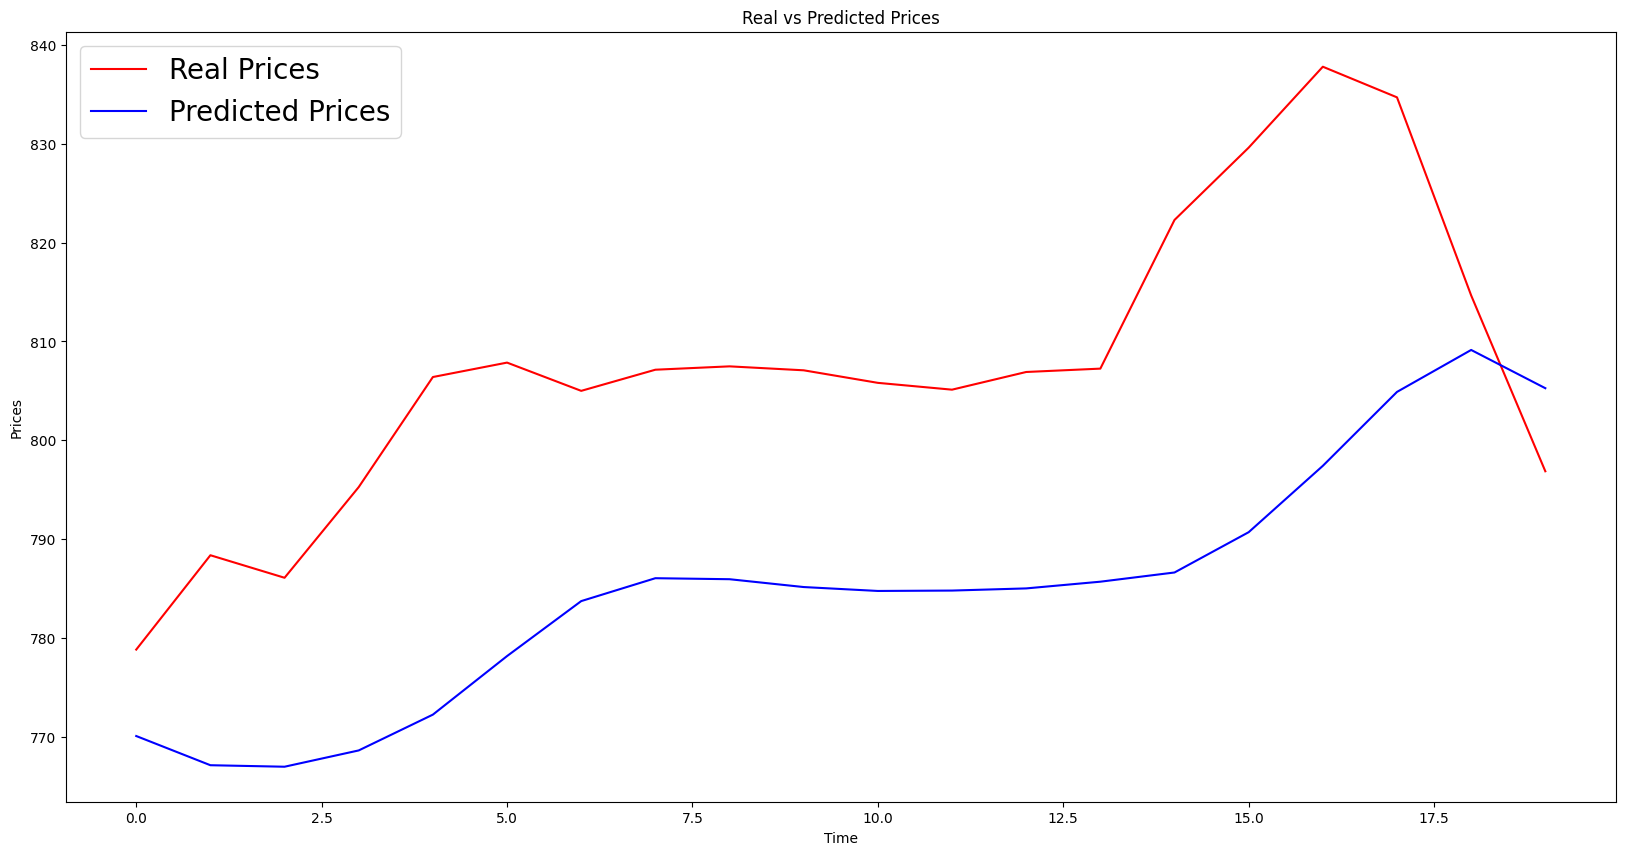

In [34]:
plt.figure(figsize=(20,10))
plt.plot(test_open,'red',label='Real Prices')
plt.plot(predicted_value,'blue',label='Predicted Prices')
plt.xlabel('Time')
plt.ylabel('Prices')
plt.title('Real vs Predicted Prices')
plt.legend(loc='best', fontsize=20)
